Source: https://www.explorium.ai/blog/top-tips-for-data-preparation-for-machine-learning-using-python/

In [7]:
import pandas as pd
from pandas import read_csv
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

### Quick cleans


   - Remove any columns with more than 50% missing values (if your data set is large enough - more on that in the next section)
   - Remove lines of extraneous text that prevents the Pandas library from parsing data properly
   - Remove any columns of URLs that you can’t access or that aren’t useful

On closer inspection of what each column means and whether it’s relevant to your purposes, you could then eliminate any that:

   - Are badly formatted
   - Contain irrelevant or redundant information
   - Would need much more pre-processing work or additional data to render useful (although you may want to consider easy ways to fill in the gaps using external data)
   - Leak future information which could undermine the predictive elements of your ML model



### Dealing with missing data

- removing columns with a high proportion of missing values df[‘column_1’] = df[‘column_1’].dropna(axis=0) 
- If you are using a smaller dataset:
    - Imputing the mean/median/mode attribute for all missing values (you can use df[‘column’].fillna() and choose .mean(), .median(), or .mode() functions to quickly solve the problem)
    - Using linear regression to impute the attribute’s missing values
    - If there is enough data that null or zero values won’t impact your data, you can simply use df.fillna(0) to replace NaN values with 0 to allow for computation.
    - Clustering your dataset into known classes and calculating missing values using inter-cluster regression
    - Combining any of the above with dropping instances or attributes on a case-by-case basis


In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = read_csv(url, names=names)

In [3]:
df

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Should you remove outliers?

Before you can make this decision, you need to have a fairly clear idea of why you have outliers. Is this the product of mistakes made during data collection? Or is it a real anomaly, a useful piece of data that can add something to your understanding? 

One quick way to check is splitting your dataset into quantiles with a simple script that will return Boolean values of True for outliers and False for normal values:

In [4]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

sepal-length    1.3
sepal-width     0.5
petal-length    3.5
petal-width     1.5
dtype: float64


In [5]:
print(df < (Q1 - 1.5*IQR))| (df > (Q3 + 1.5*IQR))

     class  petal-length  petal-width  sepal-length  sepal-width
0    False         False        False         False        False
1    False         False        False         False        False
2    False         False        False         False        False
3    False         False        False         False        False
4    False         False        False         False        False
..     ...           ...          ...           ...          ...
145  False         False        False         False        False
146  False         False        False         False        False
147  False         False        False         False        False
148  False         False        False         False        False
149  False         False        False         False        False

[150 rows x 5 columns]


TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

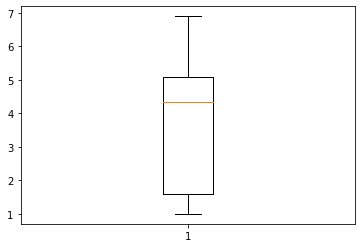

In [10]:
plt.boxplot(df["petal-length"])
plt.show()

### Transformations

#### 1. Standardize the data

you can use these techniques to standardize the mean to 0 and the standard deviation to 1. 

In [12]:
from sklearn import preprocessing
	
names = df.columns
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns = names)

ValueError: could not convert string to float: 'Iris-setosa'

#### 2. Rescale the data

Best for gradient descent (and other optimization algorithms), regression, neural networks, machine learning algorithms that use distance measures, e.g. K-Nearest Neighbors 

This also involves normalizing data attributes with different scales so that they’re all on the same scale, typically ranging from 0-1. (You can see how the scaling function works in the example below.)

#### 3. Normalize the data 

In [ ]:
from sklearn import preprocessing

df = pd.read_csv('dataset.csv')
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
df = pd.DataFrame(df_scaled)